In [1]:
import yfinance as yf
import datetime
from pandas_datareader import data as pdr
import sys
from pandas_datareader._utils import RemoteDataError
import pandas as pd
import matplotlib.pyplot as plt
import scipy.optimize as sco
import numpy as np
from statsmodels.graphics.tsaplots import plot_acf
from matplotlib import pyplot
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.ar_model import AutoReg, ar_select_order
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt
import statsmodels.api as sm

In [2]:
yesterday = datetime.datetime.now() - datetime.timedelta(days=1)
df = pdr.get_data_yahoo("MSFT")
df =df[750:]

In [3]:
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-09-15,209.779999,206.929993,208.419998,208.779999,21823900.0,205.163391
2020-09-16,210.649994,204.639999,210.619995,205.050003,26328100.0,201.498016
2020-09-17,204.330002,199.960007,200.050003,202.910004,34011300.0,199.395096
2020-09-18,203.649994,196.250000,202.800003,200.389999,55225300.0,196.918762
2020-09-21,202.710007,196.380005,197.190002,202.539993,39839700.0,199.031464
...,...,...,...,...,...,...
2022-09-13,260.399994,251.589996,258.839996,251.990005,33353300.0,251.990005
2022-09-14,254.229996,249.860001,253.529999,252.220001,23913000.0,252.220001
2022-09-15,251.399994,244.020004,249.770004,245.380005,31530900.0,245.380005


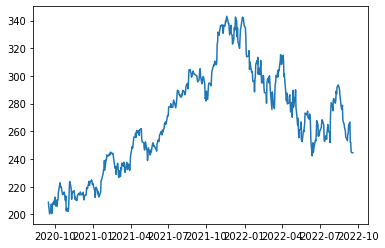

In [4]:
plt.plot(df.Close.index, df.Close)

In [5]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(df.Close)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -1.791960
p-value: 0.384461
Critical Values:
	1%: -3.443
	5%: -2.867
	10%: -2.570


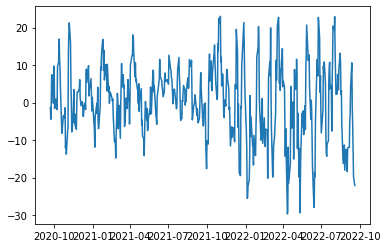

In [6]:
series2 = df.Close.diff(periods=5).dropna()
plt.plot(series2.index, series2)

In [7]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(series2)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -4.719209
p-value: 0.000077
Critical Values:
	1%: -3.444
	5%: -2.868
	10%: -2.570


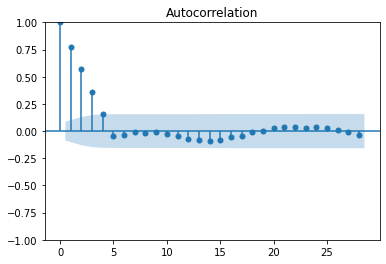

D:\Anaconda\envs\All\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


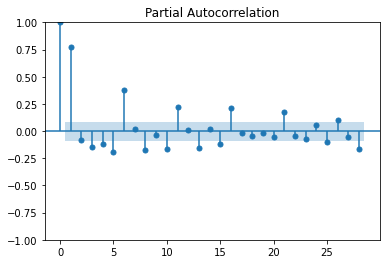

In [8]:
plot_acf(series2)
pyplot.show()

plot_pacf(series2)
pyplot.show()

D:\Anaconda\envs\All\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
D:\Anaconda\envs\All\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
D:\Anaconda\envs\All\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=2.610362, expected=9.000000


D:\Anaconda\envs\All\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=5.064427, expected=13.149994


D:\Anaconda\envs\All\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=7.943022, expected=10.410004


D:\Anaconda\envs\All\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=8.610704, expected=2.160004


D:\Anaconda\envs\All\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=5.757497, expected=3.150024


D:\Anaconda\envs\All\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=-0.202347, expected=-5.760010


D:\Anaconda\envs\All\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=-8.783680, expected=-15.720001


D:\Anaconda\envs\All\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=-13.229645, expected=-16.269989


D:\Anaconda\envs\All\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=-11.145536, expected=-15.529999


D:\Anaconda\envs\All\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=-12.864711, expected=-11.320007


D:\Anaconda\envs\All\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=-7.954335, expected=-18.059998


D:\Anaconda\envs\All\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=-9.254869, expected=-12.519989


D:\Anaconda\envs\All\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=-8.271043, expected=-13.470001


D:\Anaconda\envs\All\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=-8.924133, expected=-14.320007


D:\Anaconda\envs\All\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=-10.395318, expected=-18.450012


D:\Anaconda\envs\All\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=-11.509236, expected=-12.029999


D:\Anaconda\envs\All\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=-8.403324, expected=-11.980011


D:\Anaconda\envs\All\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=-9.051626, expected=-4.880005


D:\Anaconda\envs\All\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=-2.234191, expected=-2.950012


D:\Anaconda\envs\All\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=1.414422, expected=4.059998


D:\Anaconda\envs\All\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=2.917183, expected=10.589996


D:\Anaconda\envs\All\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=9.728637, expected=-1.259995


D:\Anaconda\envs\All\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=-0.406563, expected=-5.869995


D:\Anaconda\envs\All\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=-6.723385, expected=-13.139984


D:\Anaconda\envs\All\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=-12.728203, expected=-19.719986


D:\Anaconda\envs\All\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=-20.301854, expected=-22.129990
Test RMSE: 5.702


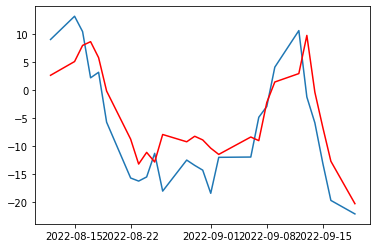

In [75]:
X = series2
size = int(len(X) * 0.95)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
# walk-forward validation
for t in range(len(test)):
    model = ARIMA(history, order=(5, 1, 2), seasonal_order=(4,0,3,7))
                                                            # 4 0 3 7
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)

    print('predicted=%f, expected=%f' % (yhat, obs))
    

rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)
# plot forecasts against actual outcomes
pyplot.plot(test.index, test)
pyplot.plot(test.index, predictions, color='red')
pyplot.show()



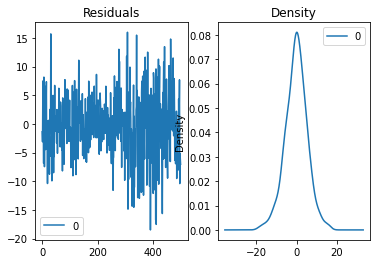

In [76]:
residuals = pd.DataFrame(model_fit.resid)
fig, ax = plt.subplots(1,2)
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

In [77]:
sm.stats.acorr_ljungbox(residuals, return_df=True)

,lb_stat,lb_pvalue
1,0.998186,3.177498e-01
2,3.043297,2.183516e-01
3,4.266654,2.340727e-01
4,4.305368,3.662534e-01
5,16.980782,4.536390e-03
6,16.993563,9.306931e-03
7,16.997351,1.741327e-02
8,21.327280,6.327024e-03
9,33.676744,1.017554e-04
10,46.891301,9.882422e-07


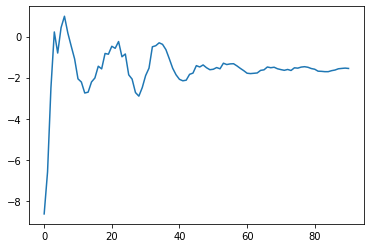

In [79]:
start = len(train)
end = len(train) + len(test) - 1

# Predictions for one-year against the test set
predictions = model_fit.predict(503, 593)
plt.plot(predictions)


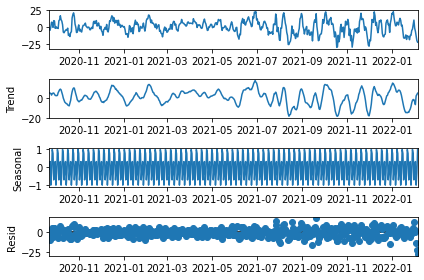

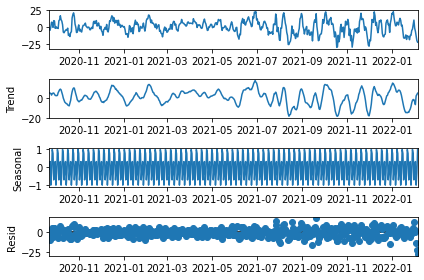

In [53]:
a = series2.to_frame()
np.random.seed(0)
n = 502
dates = np.array(str(a.Close.index[0])[:10], dtype=np.datetime64) + np.arange(n)
data = a.Close.values
dff = pd.DataFrame({'data': data}, index=dates)

# Reproduce the example in OP
decomposition = sm.tsa.seasonal_decompose(dff, model='additive', extrapolate_trend='freq')
decomposition.plot()

In [54]:
trend = decomposition.trend
seasonal = decomposition.seasonal   

In [58]:
sum(decomposition.seasonal [:7])/7

3.172065784643304e-17

In [27]:
for i in decomposition.seasonal: print(i)

-0.09083702530768162
0.3241043753197486
-0.9946287416173145
-0.31419083941328085
1.001415229178402
0.777087134449757
-0.7029501326096304
-0.09083702530768162
0.3241043753197486
-0.9946287416173145
-0.31419083941328085
1.001415229178402
0.777087134449757
-0.7029501326096304
-0.09083702530768162
0.3241043753197486
-0.9946287416173145
-0.31419083941328085
1.001415229178402
0.777087134449757
-0.7029501326096304
-0.09083702530768162
0.3241043753197486
-0.9946287416173145
-0.31419083941328085
1.001415229178402
0.777087134449757
-0.7029501326096304
-0.09083702530768162
0.3241043753197486
-0.9946287416173145
-0.31419083941328085
1.001415229178402
0.777087134449757
-0.7029501326096304
-0.09083702530768162
0.3241043753197486
-0.9946287416173145
-0.31419083941328085
1.001415229178402
0.777087134449757
-0.7029501326096304
-0.09083702530768162
0.3241043753197486
-0.9946287416173145
-0.31419083941328085
1.001415229178402
0.777087134449757
-0.7029501326096304
-0.09083702530768162
0.3241043753197486
-

In [70]:
decomposition.trend

2020-09-22    4.766533
2020-09-23    4.537757
2020-09-24    4.308982
2020-09-25    2.624287
2020-09-26    4.142859
                ...   
2022-02-01   -4.041425
2022-02-02   -6.781422
2022-02-03    1.773474
2022-02-04    3.135313
2022-02-05    4.497151
Name: trend, Length: 502, dtype: float64

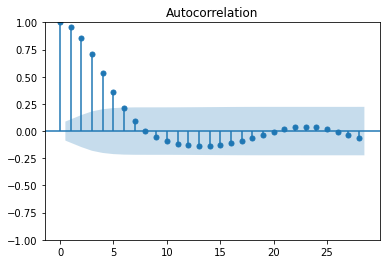

D:\Anaconda\envs\All\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


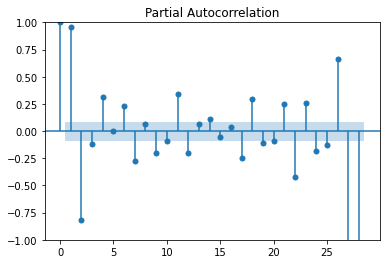

In [65]:
plot_acf(decomposition.trend)
pyplot.show()

plot_pacf(decomposition.trend)
pyplot.show()

In [20]:
from pmdarima import auto_arima

In [ ]:
stepwise_model = auto_arima(train, start_p=4, start_q=3,
                           max_p=5, max_q=5, m=252,
                           start_P=0, seasonal=True,
                           d=1, D=1, trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True)

Performing stepwise search to minimize aic


In [ ]:
model3 = auto_arima(train, start_p=1, start_q=1,
                      test='adf',
                      max_p=5, max_q=5,
                      m=252,             
                      d=1,          
                      seasonal=True,   
                      start_P=0,
                   
                    max_P=5,
                    max_D=5,
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)